## 1. Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Load dataset
df = pd.read_csv('abalone.csv')

## 2. Preprocessing

In [ ]:
# Split the Target and Feature
X = df.drop('Rings', axis=1)
y = df['Rings']

# 70/30 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

num_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

# Apply 3-sigma to Numerical Columns to the training data only
Training_Data = pd.concat([X_train, y_train], axis=1)
outlier_mask = (np.abs(X_train[num_cols] - X_train[num_cols].mean()) <= 3 * X_train[num_cols].std()).all(axis=1)
Training_Data = Training_Data[outlier_mask]

X_train = Training_Data.drop('Rings', axis=1)
y_train = Training_Data['Rings']

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# One-Hot Encoding for 'Sex'
X_train = pd.get_dummies(X_train, columns=['Sex'], prefix='Sex')
X_test = pd.get_dummies(X_test, columns=['Sex'], prefix='Sex')

# Define Target: Age = Rings + 1.5
y_train_age = np.array(y_train + 1.5).reshape(-1, 1).ravel()
y_test_age = np.array(y_test + 1.5).reshape(-1, 1).ravel()

## 3. MLP Model Training

In [ ]:
# Design Choice: 2 hidden layers (64, 32 nodes) to capture non-linearity
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

# Start timer
start_time = time.time()

mlp.fit(X_train, y_train_age)

# End timer
end_time = time.time()
training_duration = end_time - start_time

## 4. Evaluation and Visualization

MLP Training Time: 5.7123 seconds
MLP Test MSE: 4.586
MLP Test MAE: 1.513
MLP Test R²: 0.548


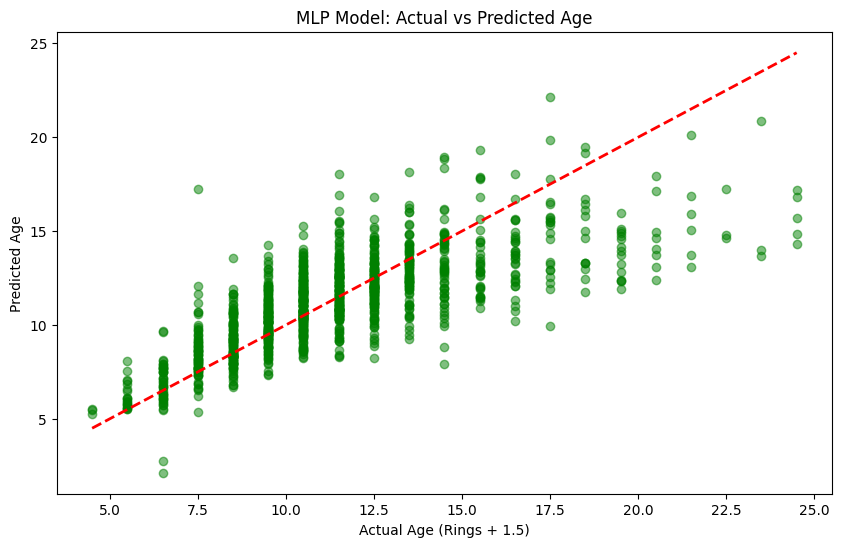

In [ ]:
# Predict the age
mlp_predict = mlp.predict(X_test)

# Calculate Metrics
test_loss = mean_squared_error(y_test_age, mlp_predict)
test_mae = mean_absolute_error(y_test_age, mlp_predict)
test_r2 = r2_score(y_test_age, mlp_predict)

print(f"MLP Training Time: {training_duration:.4f} seconds")
print(f"MLP Test MSE: {test_loss:.3f}")
print(f"MLP Test MAE: {test_mae:.3f}")
print(f"MLP Test R²: {test_r2:.3f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_age, mlp_predict, alpha=0.5, color='green')
plt.plot([y_test_age.min(), y_test_age.max()], [y_test_age.min(), y_test_age.max()], 'r--', lw=2)
plt.xlabel("Actual Age (Rings + 1.5)")
plt.ylabel("Predicted Age")
plt.title("MLP Model: Actual vs Predicted Age")
plt.show()